# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [2]:
csv = 'Online_Retail.csv'

online_rt = pd.read_csv(csv, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

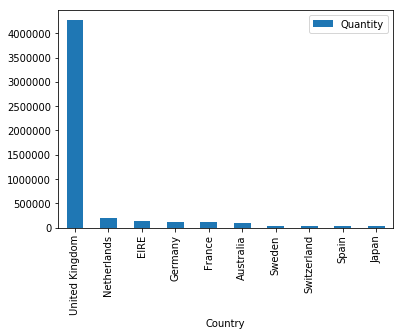

In [3]:
retail_country_quant = online_rt[['Country', 'Quantity']].groupby('Country').sum().sort_values(by='Quantity', ascending=False)
retail_country_quant[:10].plot(kind='bar')

# Need to figure out the exlcuding UK piece of this

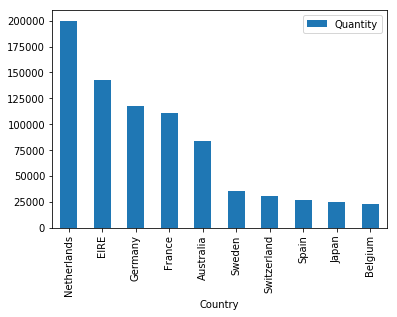

In [4]:
retail_country_quant[retail_country_quant.index != 'United Kingdom'].head(10).plot(kind='bar')
# bullseye!

### Step 5.  Exclude negative Quatity entries

In [16]:
mask = online_rt.Quantity > 0

online_rt[mask]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [21]:
top_retail_aggr = online_rt.groupby('Country').sum().sort_values(by='Quantity', ascending=False)[:3]

# Ah, they want top three, less UK and then use that to filter down online_rt

,Quantity,UnitPrice,CustomerID
Country,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09
Netherlands,200128,6.492550e+03,3.419054e+07
EIRE,142637,4.844719e+04,1.103917e+08


In [46]:
top_countries = retail_country_quant[retail_country_quant.index != 'United Kingdom'][:3].index

type(top_countries)

top_countries

'Netherlands'

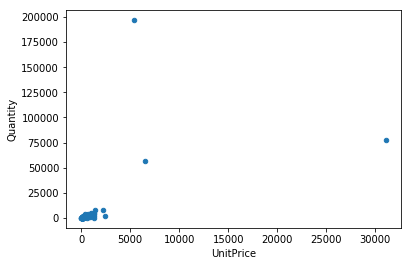

In [56]:
top_country_customer = online_rt[online_rt.Country.isin(top_countries)].groupby(['Country', 'CustomerID']).sum()

top_country_customer.plot(kind='scatter', x='UnitPrice', y='Quantity')

# So this is everything, but I just want it by country

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 107 entries, (EIRE, 14016.0) to (Netherlands, 14646.0)
Data columns (total 2 columns):
Quantity     107 non-null int64
UnitPrice    107 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.0+ KB


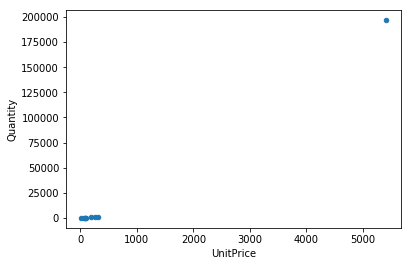

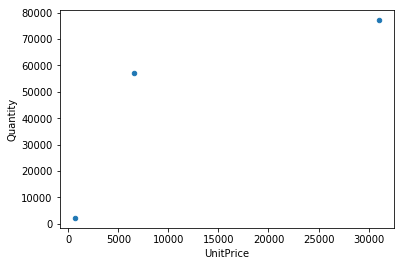

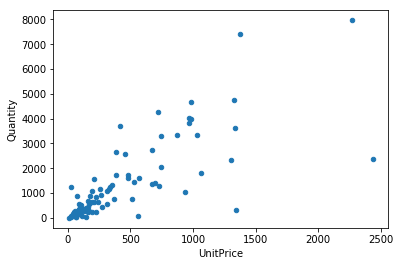

In [79]:
top_country_customer.info()

top_country_customer[:5]
top_country_customer.loc['Netherlands'].plot(kind='scatter', x='UnitPrice', y='Quantity')
top_country_customer.loc['EIRE'].plot(kind='scatter', x='UnitPrice', y='Quantity')
top_country_customer.loc['Germany'].plot(kind='scatter', x='UnitPrice', y='Quantity')
# Bullseye! But I could use unstack?

# pd.MultiIndex.get_level_values(top_country_customer, level=1) Not working


### BONUS: Create your own question and answer it.